### Getting Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("istanbul_house_prices.csv", index_col=0)

In [3]:
df

,Price,Room,View Size,Age,Floortype,Location
0,\n24.000 TL,4 + 1,\n300 m2,10 Yaşında,,"\nSarıyer,\n \nKumköy Mahallesi\n"
1,\n24.000 TL,3 + 1,\n194 m2,8 Yaşında,3. Kat,"\nSarıyer,\n \nİstinye Mahallesi\n"
2,\n38.000 TL,3 + 1,\n194 m2,8 Yaşında,Bahçe Katı,"\nSarıyer,\n \nİstinye Mahallesi\n"
3,\n10.000 TL,7 + 2,\n400 m2,35 Yaşında,,"\nSarıyer,\n \nEmirgan Mahallesi\n"
4,\n37.500 TL,4 + 1,\n236 m2,2 Yaşında,3. Kat,"\nBeşiktaş,\n \nLevazım Mahallesi\n"
...,...,...,...,...,...,...
10893,\n10.000 TL,4 + 1,\n275 m2,4 Yaşında,6. Kat,"\nBaşakşehir,\n \nBahçeşehir 1. Kısım Mahallesi\n"
10894,\n3.250 TL,1 + 1,\n74 m2,4 Yaşında,13. Kat,"\nKüçükçekmece,\n \nAtakent Mahallesi\n"
10895,\n4.600 TL,2 + 1,\n130 m2,15 Yaşında,2. Kat,"\nEyüpsultan,\n \nGöktürk Merkez Mahallesi\n"
10896,\n3.100 TL,3 + 1,\n113 m2,28 Yaşında,4. Kat,"\nAtaşehir,\n \nAtatürk Mahallesi\n"


### EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10898 entries, 0 to 10897
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      10898 non-null  object
 1   Room       10898 non-null  object
 2   View Size  10898 non-null  object
 3   Age        10898 non-null  object
 4   Floortype  10898 non-null  object
 5   Location   10898 non-null  object
dtypes: object(6)
memory usage: 596.0+ KB


In [5]:
df.sample(10)

,Price,Room,View Size,Age,Floortype,Location
3357,\n2.250 TL,3 + 1,\n118 m2,30 Yaşında,Bahçe Katı,"\nKadıköy,\n \nHasanpaşa Mahallesi\n"
7246,\n10.200 TL,2 + 1,\n120 m2,21 Yaşında,Giriş Katı,"\nBeşiktaş,\n \nUlus Mahallesi\n"
5153,\n1.750 TL,2 + 1,\n120 m2,26 Yaşında,Ara Kat,"\nEyüpsultan,\n \nRami Yeni Mahallesi\n"
10277,\n2.500 TL,2 + 1,\n90 m2,40 Yaşında,3. Kat,"\nFatih,\n \nŞehremini Mahallesi\n"
648,\n2.600 TL,2 + 2,\n135 m2,Sıfır Bina,3. Kat,"\nBağcılar,\n \nYıldıztepe Mahallesi\n"
97,\n2.350 TL,1 + 1,\n60 m2,40 Yaşında,Zemin,"\nBeşiktaş,\n \nLevazım Mahallesi\n"
4496,\n25.000 TL,4 + 1,\n200 m2,20 Yaşında,Yüksek Giriş,"\nBeşiktaş,\n \nYıldız Mahallesi\n"
895,\n6.000 TL,4 + 1,\n260 m2,20 Yaşında,5. Kat,"\nKağıthane,\n \nOrtabayır Mahallesi\n"
3787,\n6.000 TL,1 + 1,\n70 m2,1 Yaşında,5. Kat,"\nŞişli,\n \nCumhuriyet Mahallesi\n"
6069,\n10.000 TL,1 + 1,\n85 m2,25 Yaşında,5. Kat,"\nBüyükçekmece,\n \nKumburgaz Mahallesi\n"


### Data Preparation and Feature Engineering

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [7]:
df.Price

0        \n24.000 TL
1        \n24.000 TL
2        \n38.000 TL
3        \n10.000 TL
4        \n37.500 TL
            ...     
10893    \n10.000 TL
10894     \n3.250 TL
10895     \n4.600 TL
10896     \n3.100 TL
10897     \n3.400 TL
Name: Price, Length: 10898, dtype: object

In [8]:
df.Price = df.Price.str.replace("TL", "").str.replace("\n", "").str.replace(".", "").astype("int64")

In [9]:
df.Price

0        24000
1        24000
2        38000
3        10000
4        37500
         ...  
10893    10000
10894     3250
10895     4600
10896     3100
10897     3400
Name: Price, Length: 10898, dtype: int64

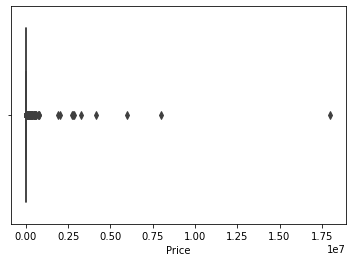

In [10]:
sns.boxplot(df.Price);

In [11]:
def adjust_outliers(df, x):
    Q1 = df[x].quantile(0.25)
    Q3 = df[x].quantile(0.75)
    IQR = Q3-Q1
    alt_sinir = Q1-1.5*IQR
    ust_sinir = Q3+1.5*IQR
    df[x][df[x] >= ust_sinir] = ust_sinir
    df[x][df[x] <= alt_sinir] = alt_sinir
    return df

In [12]:
df = adjust_outliers(df, "Price")

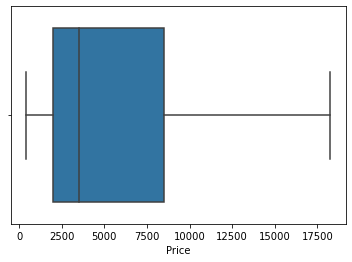

In [13]:
sns.boxplot(df.Price);

In [14]:
df.Room.unique()

array(['4 + 1', '3 + 1', '7 + 2', '6 + 1', '5 + 1', '1 + 1', '2 + 1',
       'Stüdyo', '4 + 4', '2 + 2', '6 + 2', '5 + 2', '4 + 2', '12 + 0',
       '3 + 2', '25 + 1', '90 + 5', '7 + 1', '8 + 3', '3 + 3', '15 + 4',
       '11 + 2', '6 + 3', '9 + 3', '340 + 1', '1 + 4', '4 + 0', '5 + 0',
       '1 + 2', '6 + 6', '46 + 0', '15 + 3', '4 + 3', '5 + 5', '9 + 2',
       '5 + 3', '41 + 1', '7 + 3', '8 + 2', '10 + 2', '2 + 150', '10 + 4',
       '8 + 1', '10 + 1', '9 + 1', '10 + 3', '7 + 7', '10 + 10', '5 + 4',
       '20 + 5', '20 + 10', '12 + 2', '24 + 2', '8 + 5', '30 + 7',
       '10 + 5', '20 + 8', '12 + 4', '11 + 1', '12 + 1', '18 + 3',
       '2 + 100', '125 + 1', '3 + 145', '15 + 1', '2 + 0', '3 + 0',
       '9 + 9', '52 + 1', '3 + 130', '3 + 7', '18 + 0', '3 + 117',
       '16 + 3', '15 + 6', '9 + 4', '50 + 50'], dtype=object)

In [15]:
df.Room.replace("Stüdyo", "1", inplace=True)

In [16]:
df.Room = [eval(x) for x in df.Room]

In [17]:
df.Room.astype("int64")

0        5
1        4
2        4
3        9
4        5
        ..
10893    5
10894    2
10895    3
10896    4
10897    2
Name: Room, Length: 10898, dtype: int64

In [18]:
df.Room.unique()

array([  5,   4,   9,   7,   6,   2,   3,   1,   8,  12,  26,  95,  11,
        19,  13, 341,  46,  18,  10,  42, 152,  14,  20,  25,  30,  37,
        15,  28,  16,  21, 102, 126, 148,  53, 133, 120, 100], dtype=int64)

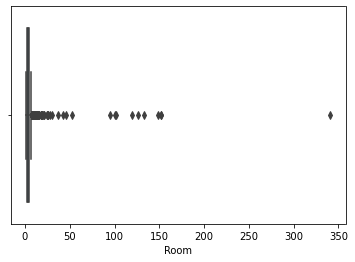

In [19]:
sns.boxplot(df.Room);

In [20]:
df = adjust_outliers(df, "Room")

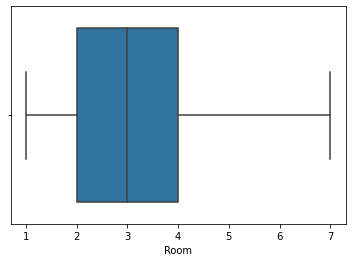

In [21]:
sns.boxplot(df.Room);

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10898 entries, 0 to 10897
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      10898 non-null  int64 
 1   Room       10898 non-null  int64 
 2   View Size  10898 non-null  object
 3   Age        10898 non-null  object
 4   Floortype  10898 non-null  object
 5   Location   10898 non-null  object
dtypes: int64(2), object(4)
memory usage: 596.0+ KB


In [23]:
df["View Size"]

0        \n300 m2
1        \n194 m2
2        \n194 m2
3        \n400 m2
4        \n236 m2
           ...   
10893    \n275 m2
10894     \n74 m2
10895    \n130 m2
10896    \n113 m2
10897     \n75 m2
Name: View Size, Length: 10898, dtype: object

In [24]:
df["View Size"] = df["View Size"].str.replace(".", "").str.replace("\n","").str.replace("m2", "").astype("int64")

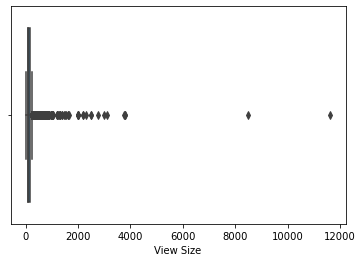

In [25]:
sns.boxplot(df["View Size"]);

In [26]:
df = adjust_outliers(df, "View Size")

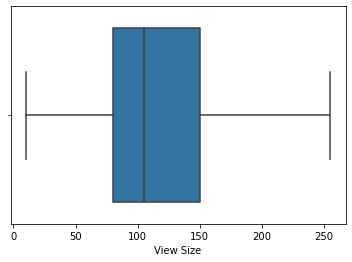

In [27]:
sns.boxplot(df["View Size"]);

In [28]:
df.Age.unique()

array(['10 Yaşında', '8 Yaşında', '35 Yaşında', '2 Yaşında', '14 Yaşında',
       '5 Yaşında', '4 Yaşında', '18 Yaşında', '25 Yaşında', '20 Yaşında',
       '1 Yaşında', 'Sıfır Bina', '33 Yaşında', '45 Yaşında', '9 Yaşında',
       '27 Yaşında', '15 Yaşında', '21 Yaşında', '6 Yaşında',
       '85 Yaşında', '11 Yaşında', '26 Yaşında', '19 Yaşında',
       '3 Yaşında', '17 Yaşında', '30 Yaşında', '16 Yaşında',
       '40 Yaşında', '28 Yaşında', '50 Yaşında', '100 Yaşında',
       '7 Yaşında', '29 Yaşında', '32 Yaşında', '22 Yaşında',
       '12 Yaşında', '31 Yaşında', '13 Yaşında', '24 Yaşında',
       '34 Yaşında', '23 Yaşında', '39 Yaşında', '36 Yaşında',
       '80 Yaşında', '43 Yaşında', '60 Yaşında', '70 Yaşında',
       '90 Yaşında', '37 Yaşında', '75 Yaşında', '110 Yaşında',
       '38 Yaşında', '53 Yaşında', '72 Yaşında', '65 Yaşında',
       '55 Yaşında', '42 Yaşında', '54 Yaşında', '150 Yaşında',
       '62 Yaşında', '41 Yaşında', '165 Yaşında', '59 Yaşında',
       '99 Yaşında

In [29]:
df.Age.replace("Sıfır Bina", "0", inplace=True)

In [30]:
df.Age = df.Age.str.extract("(\d+)").astype("int64")

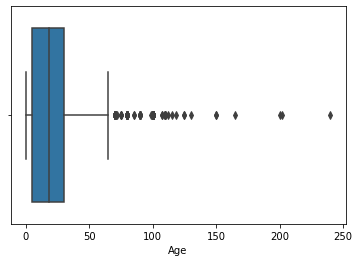

In [31]:
sns.boxplot(df.Age);

In [32]:
df = adjust_outliers(df, "Age")

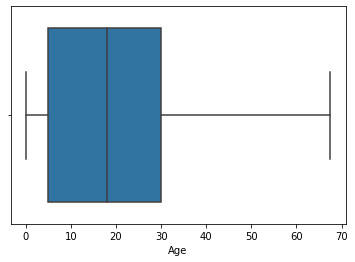

In [33]:
sns.boxplot(df.Age);

In [34]:
df.Floortype.unique()

array([' ', ' 3. Kat', ' Bahçe Katı', ' 2. Kat', ' Yüksek Giriş',
       ' Giriş Katı', ' Villa Katı', ' 4. Kat', ' Ara Kat', ' 8. Kat',
       ' 18. Kat', ' 21 ve üzeri', ' 5. Kat', ' Kot 1', ' 10. Kat',
       ' 12. Kat', ' 16. Kat', ' 1. Kat', ' 17. Kat', ' Çatı Katı',
       ' 9. Kat', ' 6. Kat', ' Zemin', ' 15. Kat', ' 11. Kat',
       ' En Üst Kat', ' 20. Kat', ' 7. Kat', ' Teras Katı',
       ' Yarı Bodrum', ' Kot 2', ' 19. Kat', ' Bodrum', ' Kot 3',
       ' 13. Kat', ' 14. Kat', ' Bodrum ve Zemin', ' Asma Kat'],
      dtype=object)

In [35]:
d = {' ve üzeri':'',
     ' Yüksek Giriş':0,
     ' Kot 1':-1,
     ' Giriş Katı':0,
     ' Ara Kat':3,     
     ' Kot 2':-2,
     ' Bahçe Katı':0,
     ' Zemin':0,
     ' Kot 3':-3,
     ' Villa Katı':1,
     ' En Üst Kat':4,
     ' Teras Katı':4,
     ' Çatı Katı':4,
     ' Yarı Bodrum':0,
     ' Bodtum ve Zemin':0,
     ' Bodrum':0,
     ' Asma Kat':1,
     '. Kat': ''}
df.Floortype.replace(d,regex=True,inplace=True)
df.Floortype = df.Floortype.replace(" ", 0)

In [36]:
df.Floortype.unique()

array([0, ' 3', ' 2', 1, ' 4', 3, ' 8', ' 18', ' 21', ' 5', -1, ' 10',
       ' 12', ' 16', ' 1', ' 17', 4, ' 9', ' 6', ' 15', ' 11', ' 20',
       ' 7', -2, ' 19', -3, ' 13', ' 14'], dtype=object)

In [37]:
df.Floortype = df.Floortype.astype("int64")

In [38]:
df.Floortype.unique()

array([ 0,  3,  2,  1,  4,  8, 18, 21,  5, -1, 10, 12, 16, 17,  9,  6, 15,
       11, 20,  7, -2, 19, -3, 13, 14], dtype=int64)

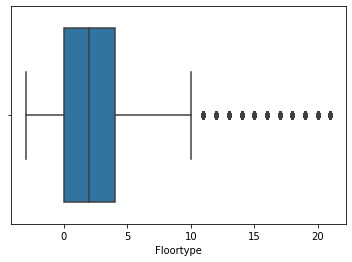

In [39]:
sns.boxplot(df.Floortype);

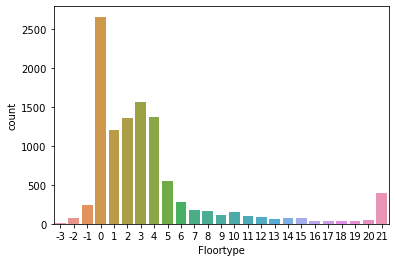

In [40]:
sns.countplot(df.Floortype);

In [41]:
df = adjust_outliers(df, "Floortype")

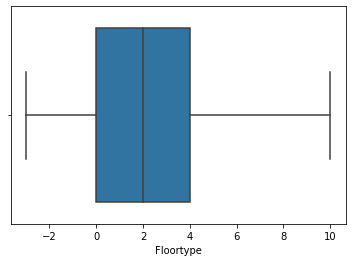

In [42]:
sns.boxplot(df.Floortype);

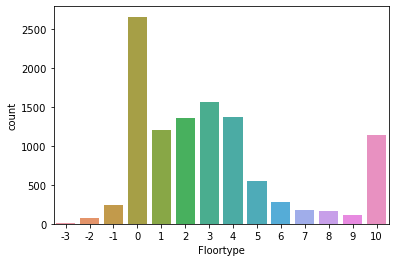

In [43]:
sns.countplot(df.Floortype);

In [44]:
df.Location.unique()

array(['\nSarıyer,\n \nKumköy Mahallesi\n',
       '\nSarıyer,\n \nİstinye Mahallesi\n',
       '\nSarıyer,\n \nEmirgan Mahallesi\n',
       '\nBeşiktaş,\n \nLevazım Mahallesi\n',
       '\nBeşiktaş,\n \nLevent Mahallesi\n',
       '\nKağıthane,\n \nEmniyet Evleri Mahallesi\n',
       '\nŞişli,\n \nBozkurt Mahallesi\n',
       '\nMaltepe,\n \nKüçükyalı Mahallesi\n',
       '\nSarıyer,\n \nYeniköy Mahallesi\n',
       '\nÜsküdar,\n \nMurat Reis Mahallesi\n',
       '\nKüçükçekmece,\n \nAtatürk Mahallesi\n',
       '\nSarıyer,\n \nUskumruköy Mahallesi\n',
       '\nBeşiktaş,\n \nKuruçeşme Mahallesi\n',
       '\nGaziosmanpaşa,\n \nKaradeniz Mahallesi\n',
       '\nŞişli,\n \nFulya Mahallesi\n',
       '\nBeşiktaş,\n \nDikilitaş Mahallesi\n',
       '\nBahçelievler,\n \nŞirinevler Mahallesi\n',
       '\nEyüpsultan,\n \nGöktürk Merkez Mahallesi\n',
       '\nEyüpsultan,\n \nMithatpaşa Mahallesi\n',
       '\nPendik,\n \nDoğu Mahallesi\n',
       '\nKağıthane,\n \nOrtabayır Mahallesi\n',
 

In [45]:
df.Location = [x.split(",")[0] for x in df.Location]

In [46]:
df.Location = df.Location.str.replace("\n", "")

In [47]:
df.Location = df.Location.astype("category")

In [48]:
df

,Price,Room,View Size,Age,Floortype,Location
0,18250,5,255,10.0,0,Sarıyer
1,18250,4,194,8.0,3,Sarıyer
2,18250,4,194,8.0,0,Sarıyer
3,10000,7,255,35.0,0,Sarıyer
4,18250,5,236,2.0,3,Beşiktaş
...,...,...,...,...,...,...
10893,10000,5,255,4.0,6,Başakşehir
10894,3250,2,74,4.0,10,Küçükçekmece
10895,4600,3,130,15.0,2,Eyüpsultan
10896,3100,4,113,28.0,4,Ataşehir


In [49]:
df = pd.get_dummies(df, drop_first=True)

## Modelling

In [50]:
y = df.Price

In [51]:
x = df.drop("Price", axis=1)

## Model

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet, Ridge, Lasso, LinearRegression
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [53]:
def algo_test(x, y):
    
    L = LinearRegression()
    E = ElasticNet()
    R = Ridge()
    Lass = Lasso()
    ETR = ExtraTreeRegressor()
    GBR = GradientBoostingRegressor()
    XGB = XGBRegressor()
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=42)
    
    algos = [L, E, R, Lass, ETR, GBR, XGB]
    algo_names = ["Linear", "ElasticNet", "Ridge", "Lasso", "ExtraTree", "GradientBoosting", "XGBRegressor"]
    r_squared = []
    rmse = []
    mae = []
    result = pd.DataFrame(columns=["R_Squared", "RMSE", "MAE"], index=algo_names)
    
    for algo in algos:
        algo.fit(x_train, y_train)
        pred = algo.predict(x_test)
        
        r_squared.append(r2_score(y_test, pred))
        rmse.append(mean_squared_error(y_test, pred)**.5)
        mae.append(mean_absolute_error(y_test, pred))
        
    result.R_Squared = r_squared
    result.RMSE = rmse
    result.MAE = mae
    
    return result.sort_values("R_Squared", ascending=False)

In [54]:
algo_test(x,y)

,R_Squared,RMSE,MAE
XGBRegressor,0.769678,2825.573576,1685.082639
GradientBoosting,0.756441,2905.631141,1839.546436
Ridge,0.712069,3159.238723,2212.687180
Lasso,0.711671,3161.422325,2212.842425
Linear,0.711635,3161.619516,2214.809465
ExtraTree,0.640276,3531.206869,1870.805031
ElasticNet,0.618653,3635.790707,2590.274615


# Deep Learning

In [55]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [56]:
x = scaler.fit_transform(x)

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.3, random_state=42)

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [59]:
model=Sequential()
model.add(Dense(81, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(27, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam', loss='mse')

In [60]:
model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),verbose=1,epochs=450)

Epoch 1/450
239/239 [==============================] - 5s 17ms/step - loss: 70111601.3333 - val_loss: 23628950.0000
Epoch 2/450
239/239 [==============================] - 1s 2ms/step - loss: 20706985.3083 - val_loss: 15682512.0000
Epoch 3/450
239/239 [==============================] - 0s 2ms/step - loss: 13718527.9792 - val_loss: 12504310.0000
Epoch 4/450
239/239 [==============================] - 1s 2ms/step - loss: 11316061.2625 - val_loss: 10909931.0000
Epoch 5/450
239/239 [==============================] - 0s 2ms/step - loss: 10465538.8083 - val_loss: 10230109.0000
Epoch 6/450
239/239 [==============================] - 0s 2ms/step - loss: 9540155.0875 - val_loss: 9909918.0000
Epoch 7/450
239/239 [==============================] - 0s 2ms/step - loss: 8833710.9938 - val_loss: 9839813.0000
Epoch 8/450
239/239 [==============================] - 1s 2ms/step - loss: 8936171.1208 - val_loss: 9541856.0000
Epoch 9/450
239/239 [==============================] - 0s 2ms/step - loss: 8821136.01

Epoch 73/450
239/239 [==============================] - 0s 2ms/step - loss: 7199577.8792 - val_loss: 8222569.5000
Epoch 74/450
239/239 [==============================] - 0s 2ms/step - loss: 7420603.0240 - val_loss: 8188352.5000
Epoch 75/450
239/239 [==============================] - 1s 2ms/step - loss: 7440169.1854 - val_loss: 8186944.0000
Epoch 76/450
239/239 [==============================] - 0s 2ms/step - loss: 7263519.4271 - val_loss: 8180581.5000
Epoch 77/450
239/239 [==============================] - 0s 2ms/step - loss: 7176032.3000 - val_loss: 8116670.5000
Epoch 78/450
239/239 [==============================] - 0s 2ms/step - loss: 7667565.8000 - val_loss: 8106190.5000
Epoch 79/450
239/239 [==============================] - 0s 2ms/step - loss: 7232069.3417 - val_loss: 8177577.0000
Epoch 80/450
239/239 [==============================] - ETA: 0s - loss: 7239900.986 - 0s 2ms/step - loss: 7245437.6750 - val_loss: 8123940.5000
Epoch 81/450
239/239 [==============================] - 0s

239/239 [==============================] - 0s 2ms/step - loss: 6080358.9125 - val_loss: 7784780.0000
Epoch 216/450
239/239 [==============================] - 0s 2ms/step - loss: 6052791.2719 - val_loss: 7796149.0000
Epoch 217/450
239/239 [==============================] - 0s 2ms/step - loss: 6231181.4927 - val_loss: 7739955.0000
Epoch 218/450
239/239 [==============================] - 0s 2ms/step - loss: 6445902.4479 - val_loss: 7789813.5000
Epoch 219/450
239/239 [==============================] - 0s 2ms/step - loss: 6154426.1188 - val_loss: 8038825.5000
Epoch 220/450
239/239 [==============================] - 0s 2ms/step - loss: 6561797.7500 - val_loss: 7742898.0000
Epoch 221/450
239/239 [==============================] - 1s 3ms/step - loss: 6100059.7396 - val_loss: 7779933.0000
Epoch 222/450
239/239 [==============================] - 1s 2ms/step - loss: 5922248.7208 - val_loss: 7768736.5000
Epoch 223/450
239/239 [==============================] - 1s 2ms/step - loss: 6586861.4896 - va

239/239 [==============================] - 0s 2ms/step - loss: 5372609.6396 - val_loss: 7859485.5000
Epoch 358/450
239/239 [==============================] - 0s 2ms/step - loss: 5700421.3490 - val_loss: 7831822.5000
Epoch 359/450
239/239 [==============================] - 0s 2ms/step - loss: 5705171.2365 - val_loss: 7791088.5000
Epoch 360/450
239/239 [==============================] - 0s 2ms/step - loss: 5782557.1458 - val_loss: 7937390.0000
Epoch 361/450
239/239 [==============================] - 0s 2ms/step - loss: 5482543.2583 - val_loss: 7788014.0000
Epoch 362/450
239/239 [==============================] - 0s 2ms/step - loss: 5361325.3937 - val_loss: 7798002.5000
Epoch 363/450
239/239 [==============================] - 0s 2ms/step - loss: 5907484.8021 - val_loss: 7795710.5000
Epoch 364/450
239/239 [==============================] - 0s 2ms/step - loss: 5430114.1177 - val_loss: 8017816.0000
Epoch 365/450
239/239 [==============================] - 0s 2ms/step - loss: 5698645.4396 - va

In [61]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 81)                5184      
_________________________________________________________________
dense_1 (Dense)              (None, 40)                3280      
_________________________________________________________________
dense_2 (Dense)              (None, 27)                1107      
_________________________________________________________________
dense_3 (Dense)              (None, 19)                532       
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 100       
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 18        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 4

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<AxesSubplot:>

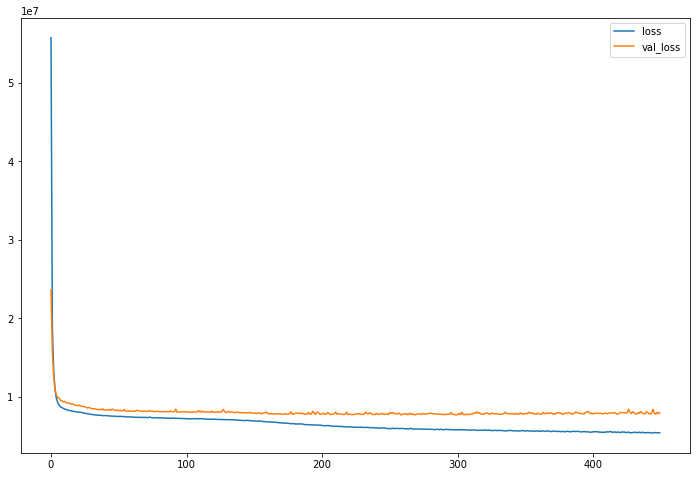

In [63]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

In [64]:
pred=model.predict(x_test)

In [65]:
(mean_squared_error(y_test, pred))**.5

2828.194352975178

In [66]:
r2_score(y_test, pred)

0.7692502186056909